## Customer Segmentation 

In [35]:
### Import necessary packages

import numpy as np
import vaex as vx
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

### Import file and print sample of the data

In [51]:
df = pd.read_csv("/Users/amol/Downloads/data.csv", encoding = 'unicode_escape')


In [52]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [53]:
df.shape

(541909, 8)

### Evaluating the data for RFM: Recency, Frequency, Monetary Value

In [57]:
df['Date'] = pd.to_datetime(df['InvoiceDate'])
df['Rank'] = df.sort_values(['CustomerID', 'Date']).groupby(['CustomerID'])['Date'].rank(method='min').astype(int)
df_rec = df[df['Rank']==1]

In [58]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Rank
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,1
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1


## Recency

In [60]:
# df_rec contains only the most recent orders for the customerID
df_rec.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Rank
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,1
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1


In [64]:
df_rec['recency'] = (df_rec['Date'] - pd.to_datetime(min(df_rec['Date']))).dt.days

/var/folders/mw/mxt1b_qn1x1_3l322qvcsx_00000gn/T/ipykernel_58797/3505644634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rec['recency'] = (df_rec['Date'] - pd.to_datetime(min(df_rec['Date']))).dt.days


In [67]:
df_rec.max()

/var/folders/mw/mxt1b_qn1x1_3l322qvcsx_00000gn/T/ipykernel_58797/488440147.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_rec.max()


InvoiceNo                  C581121
StockCode                     POST
Quantity                     74215
InvoiceDate          9/9/2011 9:38
UnitPrice                  4287.63
CustomerID                 18287.0
Country                Unspecified
Date           2011-12-09 12:16:00
Rank                             1
recency                        373
dtype: object

## Frequency
Calculating how often a customer has placed an order, and merging frequency and recency dataframes into one

In [69]:
freq = df_rec.groupby('CustomerID')['Date'].count()
df_freq = pd.DataFrame(freq).reset_index()
df_freq.columns = ['CustomerID', 'frequency']

In [70]:
rec_freq = df_freq.merge(df_rec, on = 'CustomerID')
rec_freq.head()

,CustomerID,frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date,Rank,recency
0,12346.0,1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,United Kingdom,2011-01-18 10:01:00,1,48
1,12347.0,31,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/2010 14:57,2.10,Iceland,2010-12-07 14:57:00,1,6
2,12347.0,31,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/2010 14:57,4.25,Iceland,2010-12-07 14:57:00,1,6
3,12347.0,31,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/2010 14:57,3.25,Iceland,2010-12-07 14:57:00,1,6
4,12347.0,31,537626,22492,MINI PAINT SET VINTAGE,36,12/7/2010 14:57,0.65,Iceland,2010-12-07 14:57:00,1,6


## Monetary Value

In [72]:
rec_freq['total'] = rec_freq['Quantity'] * df['UnitPrice']
m = rec_freq.groupby('CustomerID')['total'].sum()
m = pd.DataFrame(m).reset_index()
m.columns = ['CustomerID', 'monetary_value']

In [74]:
rfm = m.merge(rec_freq, on = 'CustomerID')
rfm.head()

,CustomerID,monetary_value,frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date,Rank,recency,total
0,12346.0,189248.25,1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,United Kingdom,2011-01-18 10:01:00,1,48,189248.25
1,12347.0,1246.73,31,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/2010 14:57,2.10,Iceland,2010-12-07 14:57:00,1,6,40.68
2,12347.0,1246.73,31,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/2010 14:57,4.25,Iceland,2010-12-07 14:57:00,1,6,11.00
3,12347.0,1246.73,31,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/2010 14:57,3.25,Iceland,2010-12-07 14:57:00,1,6,40.68
4,12347.0,1246.73,31,537626,22492,MINI PAINT SET VINTAGE,36,12/7/2010 14:57,0.65,Iceland,2010-12-07 14:57:00,1,6,122.04


In [76]:
finaldf = rfm[['CustomerID', 'recency', 'frequency', 'monetary_value']]
finaldf.head()

,CustomerID,recency,frequency,monetary_value
0,12346.0,48,1,189248.25
1,12347.0,6,31,1246.73
2,12347.0,6,31,1246.73
3,12347.0,6,31,1246.73
4,12347.0,6,31,1246.73


### Visualizing the newly created dataframe 

recency: 


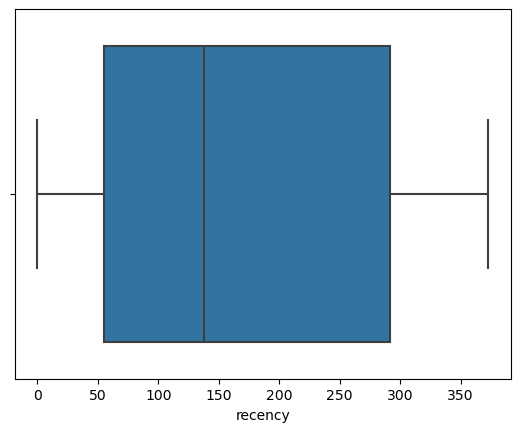

frequency: 


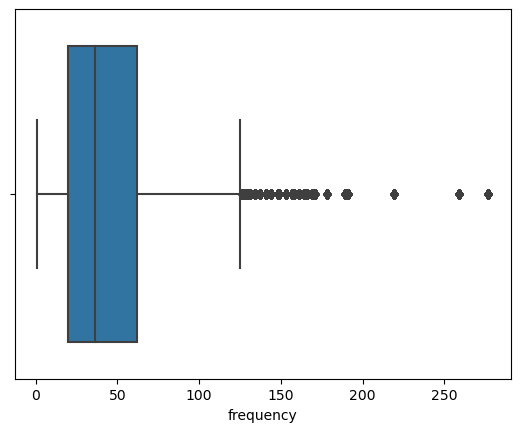

monetary_value: 


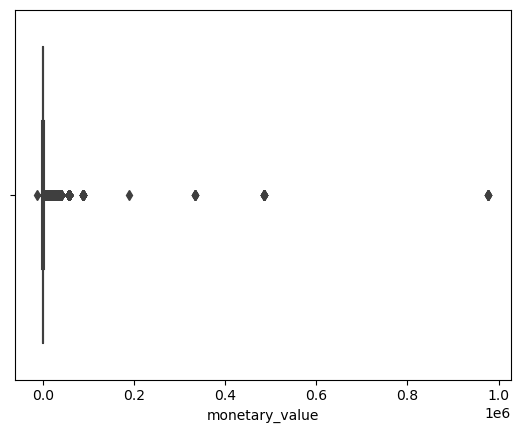

In [81]:
colList = ['recency', 'frequency', 'monetary_value']
for i in colList:
    print(str(i) + ': ')
    ax = sns.boxplot(x=finaldf[str(i)])
    plt.show()

### From the charts above, we observe that both Monetary Value and Frequency have outliers. Before we build the model, we need to remove these outliers. 




## Z-Score

### We will use Z-Score to identify the outliers in our data. Z-Score tells us how far a data point is from the mean. The distance is represented in terms of number of standard deviations from the mean. We will filter out data points that are at least 3 SD away from the mean i.e. a zscore >= 3.

In [89]:
from scipy import stats
import numpy as np

newDF = finaldf[['recency', 'frequency', 'monetary_value']]

zscores = stats.zscore(newDF)
abs_z_scores = np.abs(zscores)
filtered_entries = (abs_z_scores < 3).all(axis = 1)
newDF = newDF[filtered_entries]

In [92]:
newDF.tail()

,recency,frequency,monetary_value
100805,172,29,863.4
100806,172,29,863.4
100807,172,29,863.4
100808,172,29,863.4
100809,172,29,863.4


## Standardization

In [96]:
from sklearn.preprocessing import StandardScaler
newDF = newDF.drop_duplicates()
col_names = ['recency', 'frequency', 'monetary_value']

features = newDF[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns=col_names)

In [106]:
scaled_features


,recency,frequency,monetary_value
0,-1.196723,0.379971,0.185080
1,-1.120665,-0.259085,1.965919
2,1.752654,2.297138,0.401256
3,-0.715020,-0.259085,-0.217826
4,-0.596706,-0.350378,0.011294
...,...,...,...
4348,-0.436139,-0.578613,-0.405754
4349,0.383602,-0.715553,-0.485640
4350,0.839953,-0.715553,-0.446353
4351,-0.943195,1.566788,-0.422167


## Building the Customer Segmentation Model

Text(0, 0.5, 'Inertia')

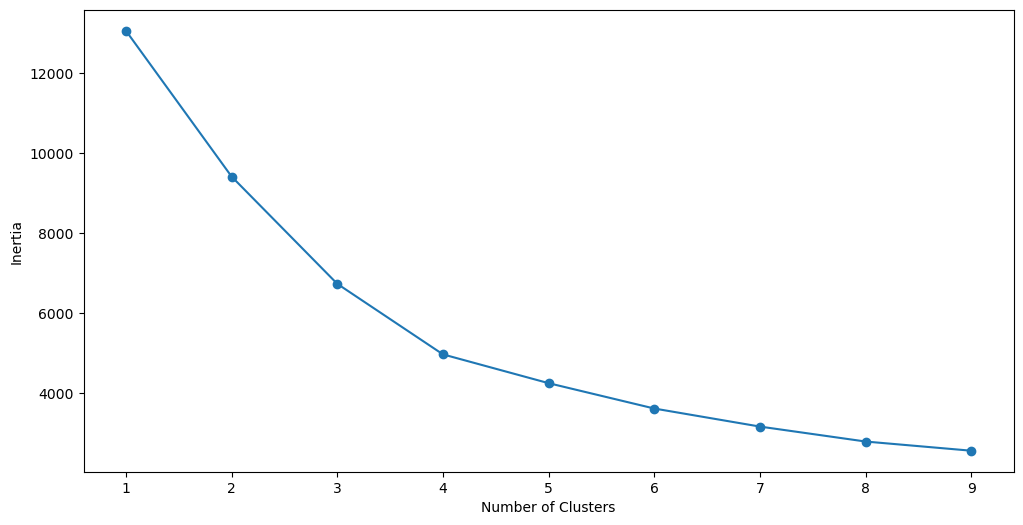

In [109]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
SSE = []

for cluster in range(1,10):
    kmeans = KMeans(n_clusters= cluster, init = 'k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
    
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE': SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')


## We notice that the decrease in inertia i.e. clustering getting more efficient, hits an inflection point at 4 clusters (x-axis). This tells us that 4 is the ideal number of clusters that we should have for this data.  

In [111]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
kmeans.fit(scaled_features)

KMeans(n_clusters=4)

### Silhouette score: 
#### This score is used to evaluate the performance of the model. This coefficient ranges from -1 to +1. Higher coefficient means a better performing model. 

In [112]:
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))


0.43600059110868045


## This model has a score of ~0.44 which is a reasonably well performing model.

## Visualizing the clusters


In [118]:
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(newDF)
frame['Cluster'] = pred

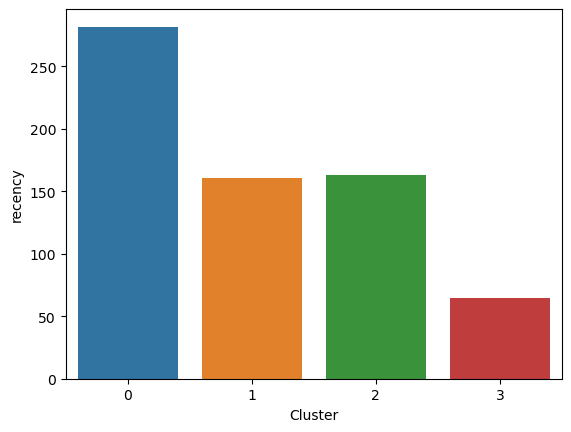

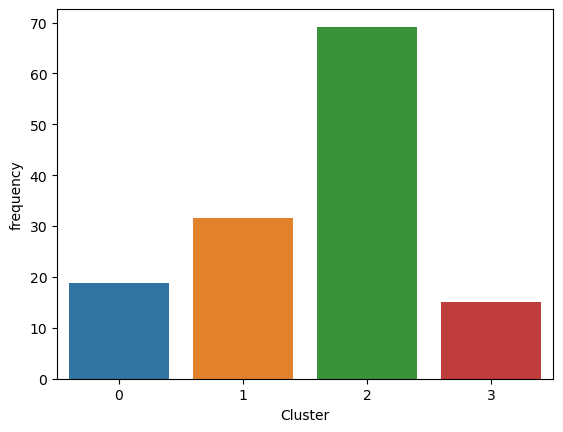

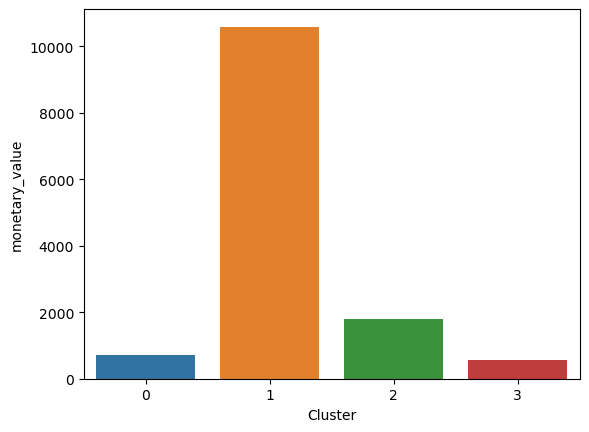

In [119]:
avg_df = frame.groupby(['Cluster'], as_index = False).mean()
for i in colList:
    sns.barplot(x='Cluster', y = str(i), data = avg_df)
    plt.show()


## Cluster 0
### Users in this cluster are very recent, and should be targeted with new customer promotional offers to establish loyalty to the brand.

## Cluster 1
### This cluster has the highest monetary value by far, but visit the store relatively infrequently. These customers are the best targets for cross-selling or upselling. Based on more analysis, we could also found if these customers are resellers who buy in bulk.

## Cluster 2
### The frequency for this cluster is extremely high, but the recency is not. This means that the users in this cluster have stopped visiting the platform lately. Might be worthwhile to offer them a promotional offer as an incentive for coming back and making a purchase, and gather more information through surveys about their experience. 

## Cluster 3
### Users in this cluster have low values for all three factors, that means they're visiting the site only occassionally and are likely to visit the site when they're looking for something specific - which is of low monetary value